# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

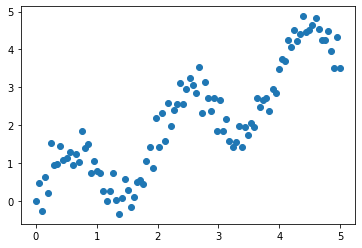

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [8]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [11]:
regr_lin.fit(X,y)#用linear 訓練

LinearRegression()

0.5712298023034195


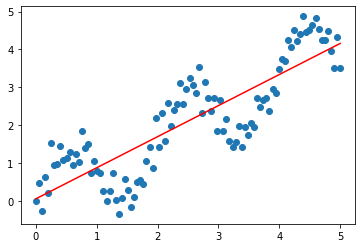

In [13]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [14]:
print(x.shape)

(100,)


In [15]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [16]:
regr_poly = LinearRegression()

In [17]:
regr_poly.fit(X_poly, y)

LinearRegression()

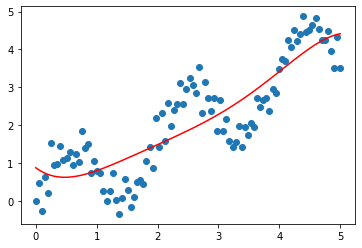

In [18]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [19]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.2050498   1.75459562 -0.77968706  0.16577126 -0.01294455]
interception:  0.8793592490409883


In [20]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b#矩陣相成注意維度

array([0.87935925, 0.82287433, 0.77475282, 0.73443026, 0.70136702,
       0.67504785, 0.65498134, 0.64069942, 0.63175683, 0.62773062,
       0.62821966, 0.63284409, 0.64124486, 0.65308316, 0.66803996,
       0.68581548, 0.70612866, 0.72871669, 0.75333447, 0.77975412,
       0.80776444, 0.83717042, 0.86779274, 0.89946724, 0.9320444 ,
       0.96538888, 0.99937895, 1.033906  , 1.06887406, 1.10419923,
       1.13980924, 1.17564288, 1.21164951, 1.24778856, 1.28402902,
       1.32034891, 1.35673479, 1.39318122, 1.42969029, 1.46627109,
       1.50293918, 1.53971612, 1.57662892, 1.61370957, 1.65099449,
       1.68852404, 1.726342  , 1.76449509, 1.80303241, 1.84200496,
       1.88146514, 1.9214662 , 1.96206178, 2.00330536, 2.04524976,
       2.08794663, 2.13144596, 2.17579553, 2.22104044, 2.26722257,
       2.31438007, 2.36254689, 2.41175221, 2.46201998, 2.51336837,
       2.5658093 , 2.61934787, 2.67398194, 2.72970153, 2.78648835,
       2.8443153 , 2.90314593, 2.96293396, 3.02362273, 3.08514

In [21]:
regr_poly.predict(X_poly)

array([0.87935925, 0.82287433, 0.77475282, 0.73443026, 0.70136702,
       0.67504785, 0.65498134, 0.64069942, 0.63175683, 0.62773062,
       0.62821966, 0.63284409, 0.64124486, 0.65308316, 0.66803996,
       0.68581548, 0.70612866, 0.72871669, 0.75333447, 0.77975412,
       0.80776444, 0.83717042, 0.86779274, 0.89946724, 0.9320444 ,
       0.96538888, 0.99937895, 1.033906  , 1.06887406, 1.10419923,
       1.13980924, 1.17564288, 1.21164951, 1.24778856, 1.28402902,
       1.32034891, 1.35673479, 1.39318122, 1.42969029, 1.46627109,
       1.50293918, 1.53971612, 1.57662892, 1.61370957, 1.65099449,
       1.68852404, 1.726342  , 1.76449509, 1.80303241, 1.84200496,
       1.88146514, 1.9214662 , 1.96206178, 2.00330536, 2.04524976,
       2.08794663, 2.13144596, 2.17579553, 2.22104044, 2.26722257,
       2.31438007, 2.36254689, 2.41175221, 2.46201998, 2.51336837,
       2.5658093 , 2.61934787, 2.67398194, 2.72970153, 2.78648835,
       2.8443153 , 2.90314593, 2.96293396, 3.02362273, 3.08514

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$
做常態分佈的方程式

In [22]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [23]:
sigma = 0.3

In [30]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])
#RBF(k,平均值,標準差)

In [25]:
regr_rbf = LinearRegression()

In [26]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

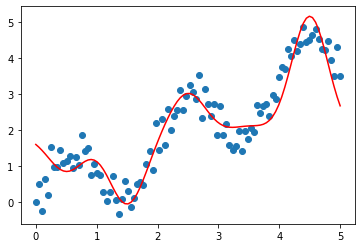

In [27]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')
#分0.5 1.5 2.5 3.5 4.5分別去預測

In [31]:
print('Coefficients: ', regr_rbf.coef_)#斜率會有5個點 因為我們分成五筆資料預測
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.99442749 -1.90968642  1.18219029  0.2505497   3.32583281]
interception:  1.8458022374912095


#### Comparison

In [32]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

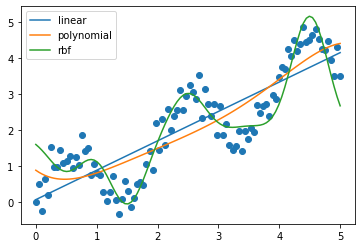

In [33]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [34]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))#第一個方法mse

0.5712298023034195


In [35]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))#第二個方法mse

0.511302285694682


In [36]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))#第三個方法mse

0.2599795952492851
